In [123]:
# importing libraries
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline
import IPython.display
import librosa
import librosa.display
import IPython.display as ipd

from scipy.io import wavfile

from scipy.signal import lfilter
from subprocess import check_call
import sys
import os

INT16_FAC = (2**15)-1
INT32_FAC = (2**31)-1
INT64_FAC = (2**63)-1
norm_fact = {'int16':INT16_FAC, 'int32':INT32_FAC, 'int64':INT64_FAC,'float32':1.0,'float64':1.0}


In [97]:
track = '../../samples/monohat.wav'
x, sr = librosa.load(track, sr = 44100, mono = 'True')
# plt.figure(figsize=(16,6))
# plt.subplot(2,2,1)
# librosa.display.waveplot(x1)
# plt.title(x1)
ipd.Audio(x, rate=sr)

In [121]:
az = 120
hrtfpathL = os.path.join('kemar','elev0','L0e%03da.dat' % az)
hrtfpathR = os.path.join('kemar','elev0','R0e%03da.dat' % az)
# hrtfpathL = os.path.join('kemar','headphones+spkr','Senn-HD480-L.dat')
# hrtfpathR = os.path.join('kemar','headphones+spkr','Senn-HD480-R.dat')
print hrtfpathL

hrtf_l = (np.fromfile(file(hrtfpathL, 'rb'), 'int', 256)).astype(float)
hrtf_r = (np.fromfile(file(hrtfpathR, 'rb'), 'int', 256)).astype(float)
hrtf = [hrtf_l,hrtf_r]


# plt.figure(figsize=(16,6))
# plt.plot(hrtf[0])
# plt.plot(hrtf[1])
# plt.show()
# print np.shape(hrtf)

left = lfilter(hrtf[0], 1.0, x)
right = lfilter(hrtf[1], 1.0, x)

# plt.figure(figsize=(16,6))
# plt.plot(left)
# plt.plot(right)
# plt.show()

binaural = [left,right]
ipd.Audio(binaural, rate=sr)


kemar/elev0/L0e120a.dat


CIPC/subject03/0azleft.wav
(2, 200)


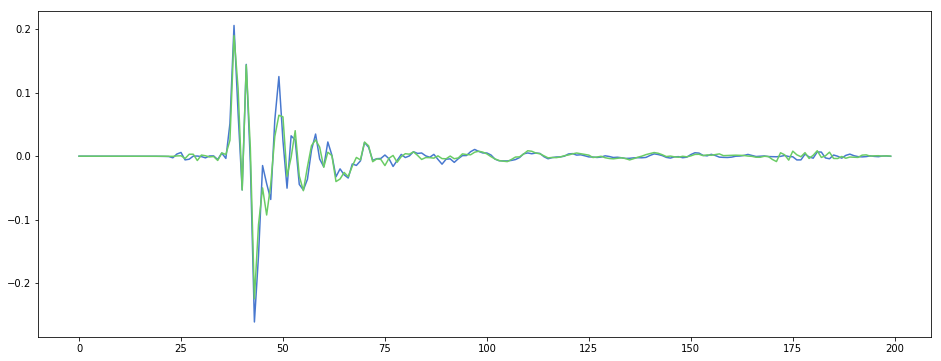

(2, 200)


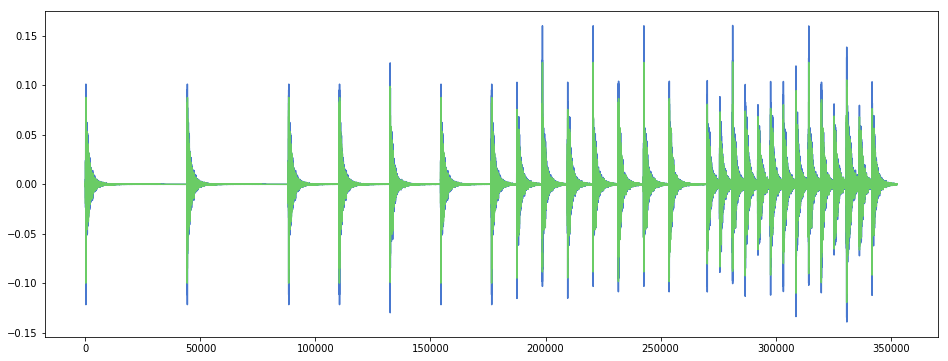

In [144]:
az = 0
elev = 8
hrtfpathL = os.path.join('CIPC','subject03','%dazleft.wav' % az)
hrtfpathR = os.path.join('CIPC','subject03','%dazright.wav' % az)
print hrtfpathL

fs, h_sigL = wavfile.read(hrtfpathL)
fs, h_sigR = wavfile.read(hrtfpathR)
h_sigL = np.float32(h_sigL)/norm_fact[h_sigL.dtype.name]
h_sigR = np.float32(h_sigR)/norm_fact[h_sigR.dtype.name]
hrtf[0] = h_sigL[elev]
hrtf[1] = h_sigR[elev]
print(np.shape(hrtf))

plt.figure(figsize=(16,6))
plt.plot(hrtf[0])
plt.plot(hrtf[1])
plt.show()
print np.shape(hrtf)

left = lfilter(hrtf[0], 1.0, x)
right = lfilter(hrtf[1], 1.0, x)

plt.figure(figsize=(16,6))
plt.plot(left)
plt.plot(right)
plt.show()

binaural_CIPC = [left,right]
ipd.Audio(binaural_CIPC, rate=sr)

